1. Data Acquisition and Exploration


In [ ]:
pip install yfinance


In [ ]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.7 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import mplfinance as mpf
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline


Sector - Banking
1.   JPMorgan Chase (JPM)
2.   Bank of America (BAC)
3.   Wells Fargo (WFC)
4.   Citigroup (C)
5.   Goldman Sachs (GS)

## **Price Variables**
1.  Open
The open price is the stock's trading price at the beginning of the trading day. It represents the first price at which the stock traded when the market opened.

2.  Close
The close price is the stock's last trading price before the market officially closes for regular trading hours5. This is the raw price that doesn't account for any after-hours corporate actions.

3.  Adj Close
The adjusted closing price amends the stock's closing price to reflect its value after accounting for any corporate actions like stock splits, dividends, and rights offerings4. It provides a more accurate representation of the stock's value for historical analysis.

4.  High
The highest price the stock reached during the trading day.

5.  Low
The lowest price the stock reached during the trading day.

6. Volume represents the total number of shares traded for the stock during the given time period (usually a day).

In [ ]:
bank_tickers = ["JPM","BAC","WFC","C","GS"]
start_date = "2020-01-01"
end_date = "2024-09-01"

data =yf.download(bank_tickers,start=start_date, end=end_date)

[*********************100%***********************]  5 of 5 completed


In [ ]:
data.head()

Price                      Adj Close                                     \
Ticker                           BAC          C          GS         JPM   
Date                                                                      
2020-01-02 00:00:00+00:00  31.647974  67.718155  208.356308  122.104622   
2020-01-03 00:00:00+00:00  30.990879  66.442665  205.919922  120.493279   
2020-01-06 00:00:00+00:00  30.946468  66.234238  208.027298  120.397461   
2020-01-07 00:00:00+00:00  30.742229  65.659019  209.396667  118.350632   
2020-01-08 00:00:00+00:00  31.053032  66.159218  211.415131  119.273880   

Price                                     Close                         \
Ticker                           WFC        BAC          C          GS   
Date                                                                     
2020-01-02 00:00:00+00:00  47.324253  35.639999  81.230003  234.320007   
2020-01-03 00:00:00+00:00  47.033691  34.900002  79.699997  231.580002   
2020-01-06 00:00:00+00:00  46.751953  34.849998  79.449997  233.949997   
2020-01-07 00:00:00+00:00  46.364559  34.619999  78.760002  235.490005   
2020-01-08 00:00:00+00:00  46.505432  34.970001  79.360001  237.759995   

Price                                             ...       Open             \
Ticker                            JPM        WFC  ...        BAC          C   
Date                                              ...                         
2020-01-02 00:00:00+00:00  141.089996  53.750000  ...  35.349998  80.129997   
2020-01-03 00:00:00+00:00  138.339996  53.419998  ...  34.980000  79.800003   
2020-01-06 00:00:00+00:00  138.229996  53.099998  ...  34.410000  78.720001   
2020-01-07 00:00:00+00:00  135.880005  52.660000  ...  34.700001  79.290001   
2020-01-08 00:00:00+00:00  136.940002  52.820000  ...  34.570000  78.769997   

Price                                                           Volume  \
Ticker                             GS         JPM        WFC       BAC   
Date                                                                     
2020-01-02 00:00:00+00:00  231.000000  139.789993  53.849998  37614200   
2020-01-03 00:00:00+00:00  231.600006  137.500000  53.110001  50357900   
2020-01-06 00:00:00+00:00  229.929993  136.559998  52.740002  42185000   
2020-01-07 00:00:00+00:00  235.000000  137.279999  53.049999  34149000   
2020-01-08 00:00:00+00:00  235.679993  135.699997  52.840000  45311600   

Price                                                             
Ticker                            C       GS       JPM       WFC  
Date                                                              
2020-01-02 00:00:00+00:00  12728900  3736300  10803700  16803100  
2020-01-03 00:00:00+00:00  12437400  2274500  10386800  15608800  
2020-01-06 00:00:00+00:00  10059500  3329300  10259000  13200300  
2020-01-07 00:00:00+00:00  10469100  5255200  10531300  13278600  
2020-01-08 00:00:00+00:00  11292400  3564700   9695300  16585600  

[5 rows x 30 columns]

In [ ]:
bac = yf.download("BAC",start_date,end_date)
c = yf.download("C",start_date,end_date)
gs = yf.download("GS",start_date,end_date)
jpm = yf.download("JPM",start_date,end_date)
wfc = yf.download("WFC",start_date,end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
bac.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,35.349998,35.660000,35.290001,35.639999,31.647974,37614200
2020-01-03,34.980000,35.150002,34.759998,34.900002,30.990879,50357900
2020-01-06,34.410000,34.900002,34.369999,34.849998,30.946468,42185000
2020-01-07,34.700001,34.919998,34.529999,34.619999,30.742229,34149000
2020-01-08,34.570000,35.189999,34.549999,34.970001,31.053032,45311600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1174 entries, 2020-01-02 00:00:00+00:00 to 2024-08-30 00:00:00+00:00
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, BAC)  1174 non-null   float64
 1   (Adj Close, C)    1174 non-null   float64
 2   (Adj Close, GS)   1174 non-null   float64
 3   (Adj Close, JPM)  1174 non-null   float64
 4   (Adj Close, WFC)  1174 non-null   float64
 5   (Close, BAC)      1174 non-null   float64
 6   (Close, C)        1174 non-null   float64
 7   (Close, GS)       1174 non-null   float64
 8   (Close, JPM)      1174 non-null   float64
 9   (Close, WFC)      1174 non-null   float64
 10  (High, BAC)       1174 non-null   float64
 11  (High, C)         1174 non-null   float64
 12  (High, GS)        1174 non-null   float64
 13  (High, JPM)       1174 non-null   float64
 14  (High, WFC)       1174 non-null   float64
 15  (Low, BAC)        1174 non-null   float64

In [ ]:
data.describe()

Price     Adj Close                                                      \
Ticker          BAC            C           GS          JPM          WFC   
count   1174.000000  1174.000000  1174.000000  1174.000000  1174.000000   
mean      31.993792    50.751642   309.272579   133.422989    40.483922   
std        6.475012     9.395197    80.269340    32.008252    10.017141   
min       16.157310    29.698830   120.748512    68.834633    19.272535   
25%       27.348629    43.305891   275.651382   110.846523    36.487988   
50%       32.168459    48.267994   316.789398   134.178177    41.484707   
75%       37.050693    60.125470   356.065460   147.523434    45.526898   
max       45.891747    70.338814   510.250000   223.430817    61.867371   

Price         Close                                                      ...  \
Ticker          BAC            C           GS          JPM          WFC  ...   
count   1174.000000  1174.000000  1174.000000  1174.000000  1174.000000  ...   
mean      34.047513    55.827581   327.845230   142.180562    42.864395  ...   
std        6.698357    10.821205    77.892135    30.074220     9.815133  ...   
min       18.080000    35.389999   134.970001    79.029999    21.139999  ...   
25%       28.670000    46.742501   295.509995   121.092503    38.842500  ...   
50%       33.975000    52.600000   335.720001   140.899994    43.949999  ...   
75%       39.125001    64.237499   380.487503   158.335003    48.537500  ...   
max       49.380001    81.910004   510.250000   224.800003    62.340000  ...   

Price          Open                                                      \
Ticker          BAC            C           GS          JPM          WFC   
count   1174.000000  1174.000000  1174.000000  1174.000000  1174.000000   
mean      34.046073    55.856755   327.671661   142.129608    42.862845   
std        6.706297    10.835148    77.830471    29.962477     9.795079   
min       19.260000    35.470001   136.029999    81.559998    21.049999   
25%       28.709999    46.825000   296.067497   121.040001    38.730000   
50%       33.910000    52.460001   336.104996   140.485001    43.965000   
75%       39.107500    64.315001   380.397507   158.527500    48.594999   
max       49.910000    81.959999   512.340027   222.500000    62.450001   

Price         Volume                                                          
Ticker           BAC             C            GS           JPM           WFC  
count   1.174000e+03  1.174000e+03  1.174000e+03  1.174000e+03  1.174000e+03  
mean    5.090846e+07  2.030005e+07  2.747307e+06  1.341980e+07  2.664281e+07  
std     2.300717e+07  8.827787e+06  1.381649e+06  7.134587e+06  1.475307e+07  
min     1.581560e+07  5.941000e+06  4.601000e+05  3.220500e+06  4.913300e+06  
25%     3.665868e+07  1.437722e+07  1.871100e+06  8.809175e+06  1.618158e+07  
50%     4.543825e+07  1.834655e+07  2.402900e+06  1.157620e+07  2.201635e+07  
75%     5.738345e+07  2.429908e+07  3.206600e+06  1.520170e+07  3.359582e+07  
max     2.184033e+08  8.656620e+07  1.444830e+07  5.441880e+07  1.189526e+08  

[8 rows x 30 columns]

Getting the information of each company

In [ ]:
def get_info(dataframe):
  stock_info=pd.DataFrame({
      'Datatype': dataframe.dtypes,
      'Total_Element':dataframe.count(),
      'Null_Count': dataframe.isnull().sum(),
      'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100

  })
  return stock_info

In [ ]:
get_info(bac)

,Datatype,Total_Element,Null_Count,Null_Percentage
Open,float64,1174,0,0.0
High,float64,1174,0,0.0
Low,float64,1174,0,0.0
Close,float64,1174,0,0.0
Adj Close,float64,1174,0,0.0
Volume,int64,1174,0,0.0


2. Data Analysis and Visualization


1. Closing Price: The closing price is the final price at which a security trades during a regular trading session. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

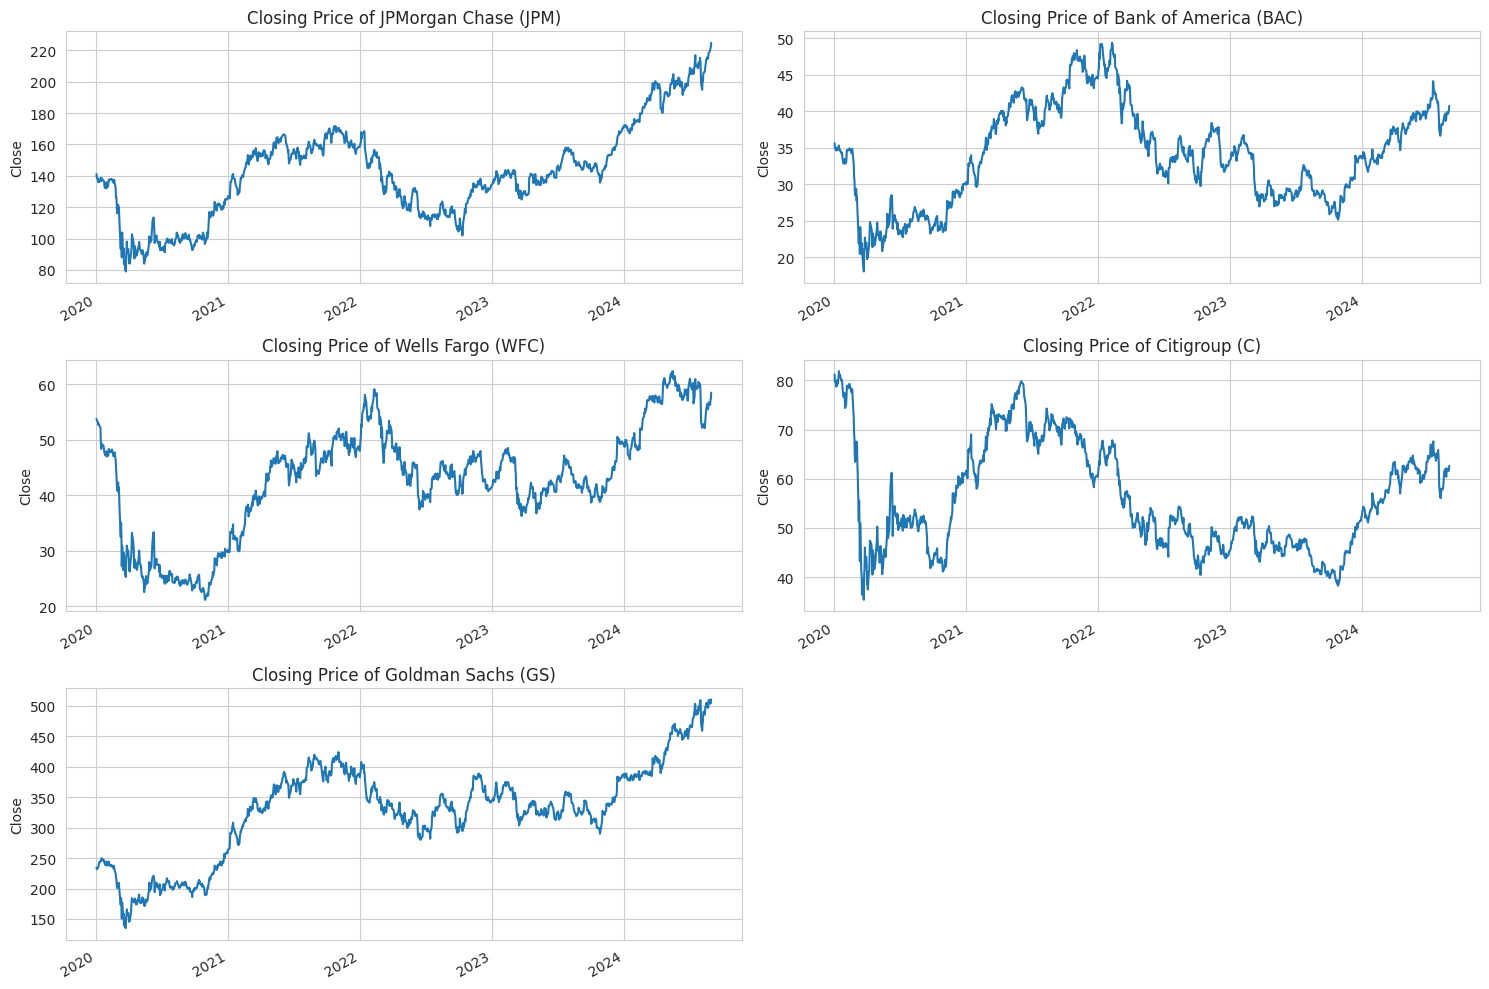

In [ ]:
company_list =[jpm,bac,wfc,c,gs]
company_names = ["JPMorgan Chase (JPM)", "Bank of America (BAC)", "Wells Fargo (WFC)", "Citigroup (C)", "Goldman Sachs (GS)"]


plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_names[i - 1]}")

plt.tight_layout()


2. Volume:Volume in stock trading refers to the total number of shares traded for a particular stock during a specified time period, typically a single trading day.

Volume is an indicator of market activity and liquidity.

Higher trading volumes are generally considered more positive than lower volumes because they indicate more liquidity and better order execution

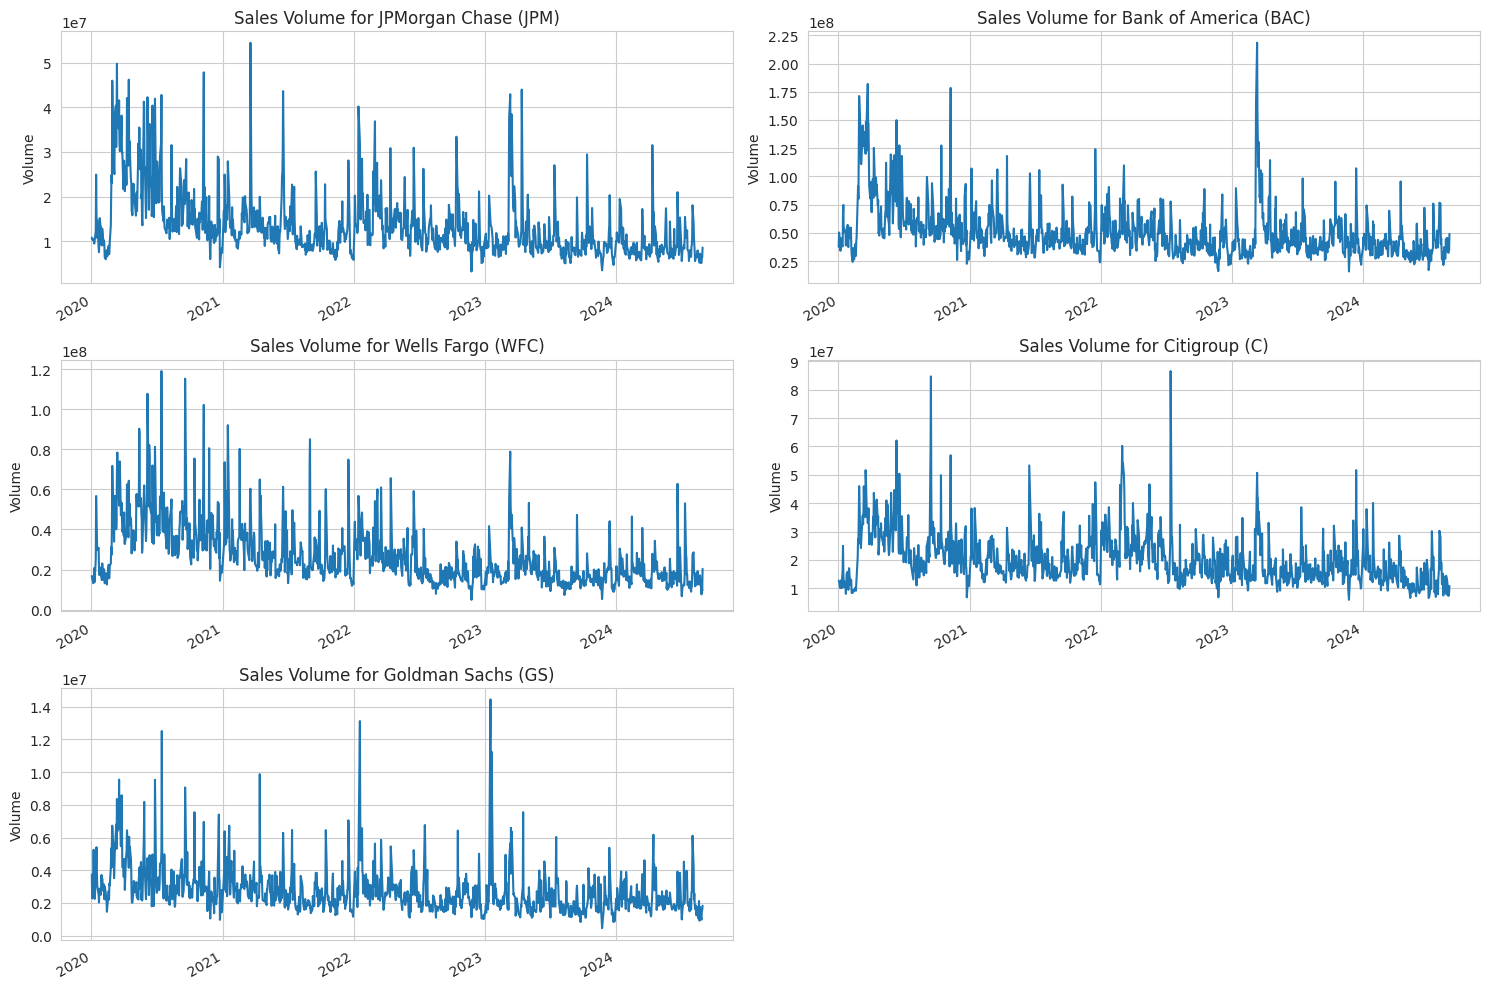

In [ ]:
company_list =[jpm,bac,wfc,c,gs]
company_names = ["JPMorgan Chase (JPM)", "Bank of America (BAC)", "Wells Fargo (WFC)", "Citigroup (C)", "Goldman Sachs (GS)"]


plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_names[i - 1]}")

plt.tight_layout()

In [ ]:
bac.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,35.349998,35.660000,35.290001,35.639999,31.647974,37614200
2020-01-03,34.980000,35.150002,34.759998,34.900002,30.990879,50357900
2020-01-06,34.410000,34.900002,34.369999,34.849998,30.946468,42185000
2020-01-07,34.700001,34.919998,34.529999,34.619999,30.742229,34149000
2020-01-08,34.570000,35.189999,34.549999,34.970001,31.053032,45311600


Moving Average for the Stocks

A moving average (MA) is a stock indicator commonly used in technical analysis, used to help smooth out price data by creating a constantly updated average price. A rising moving average indicates that the security is in an uptrend, while a declining moving average indicates a downtrend.

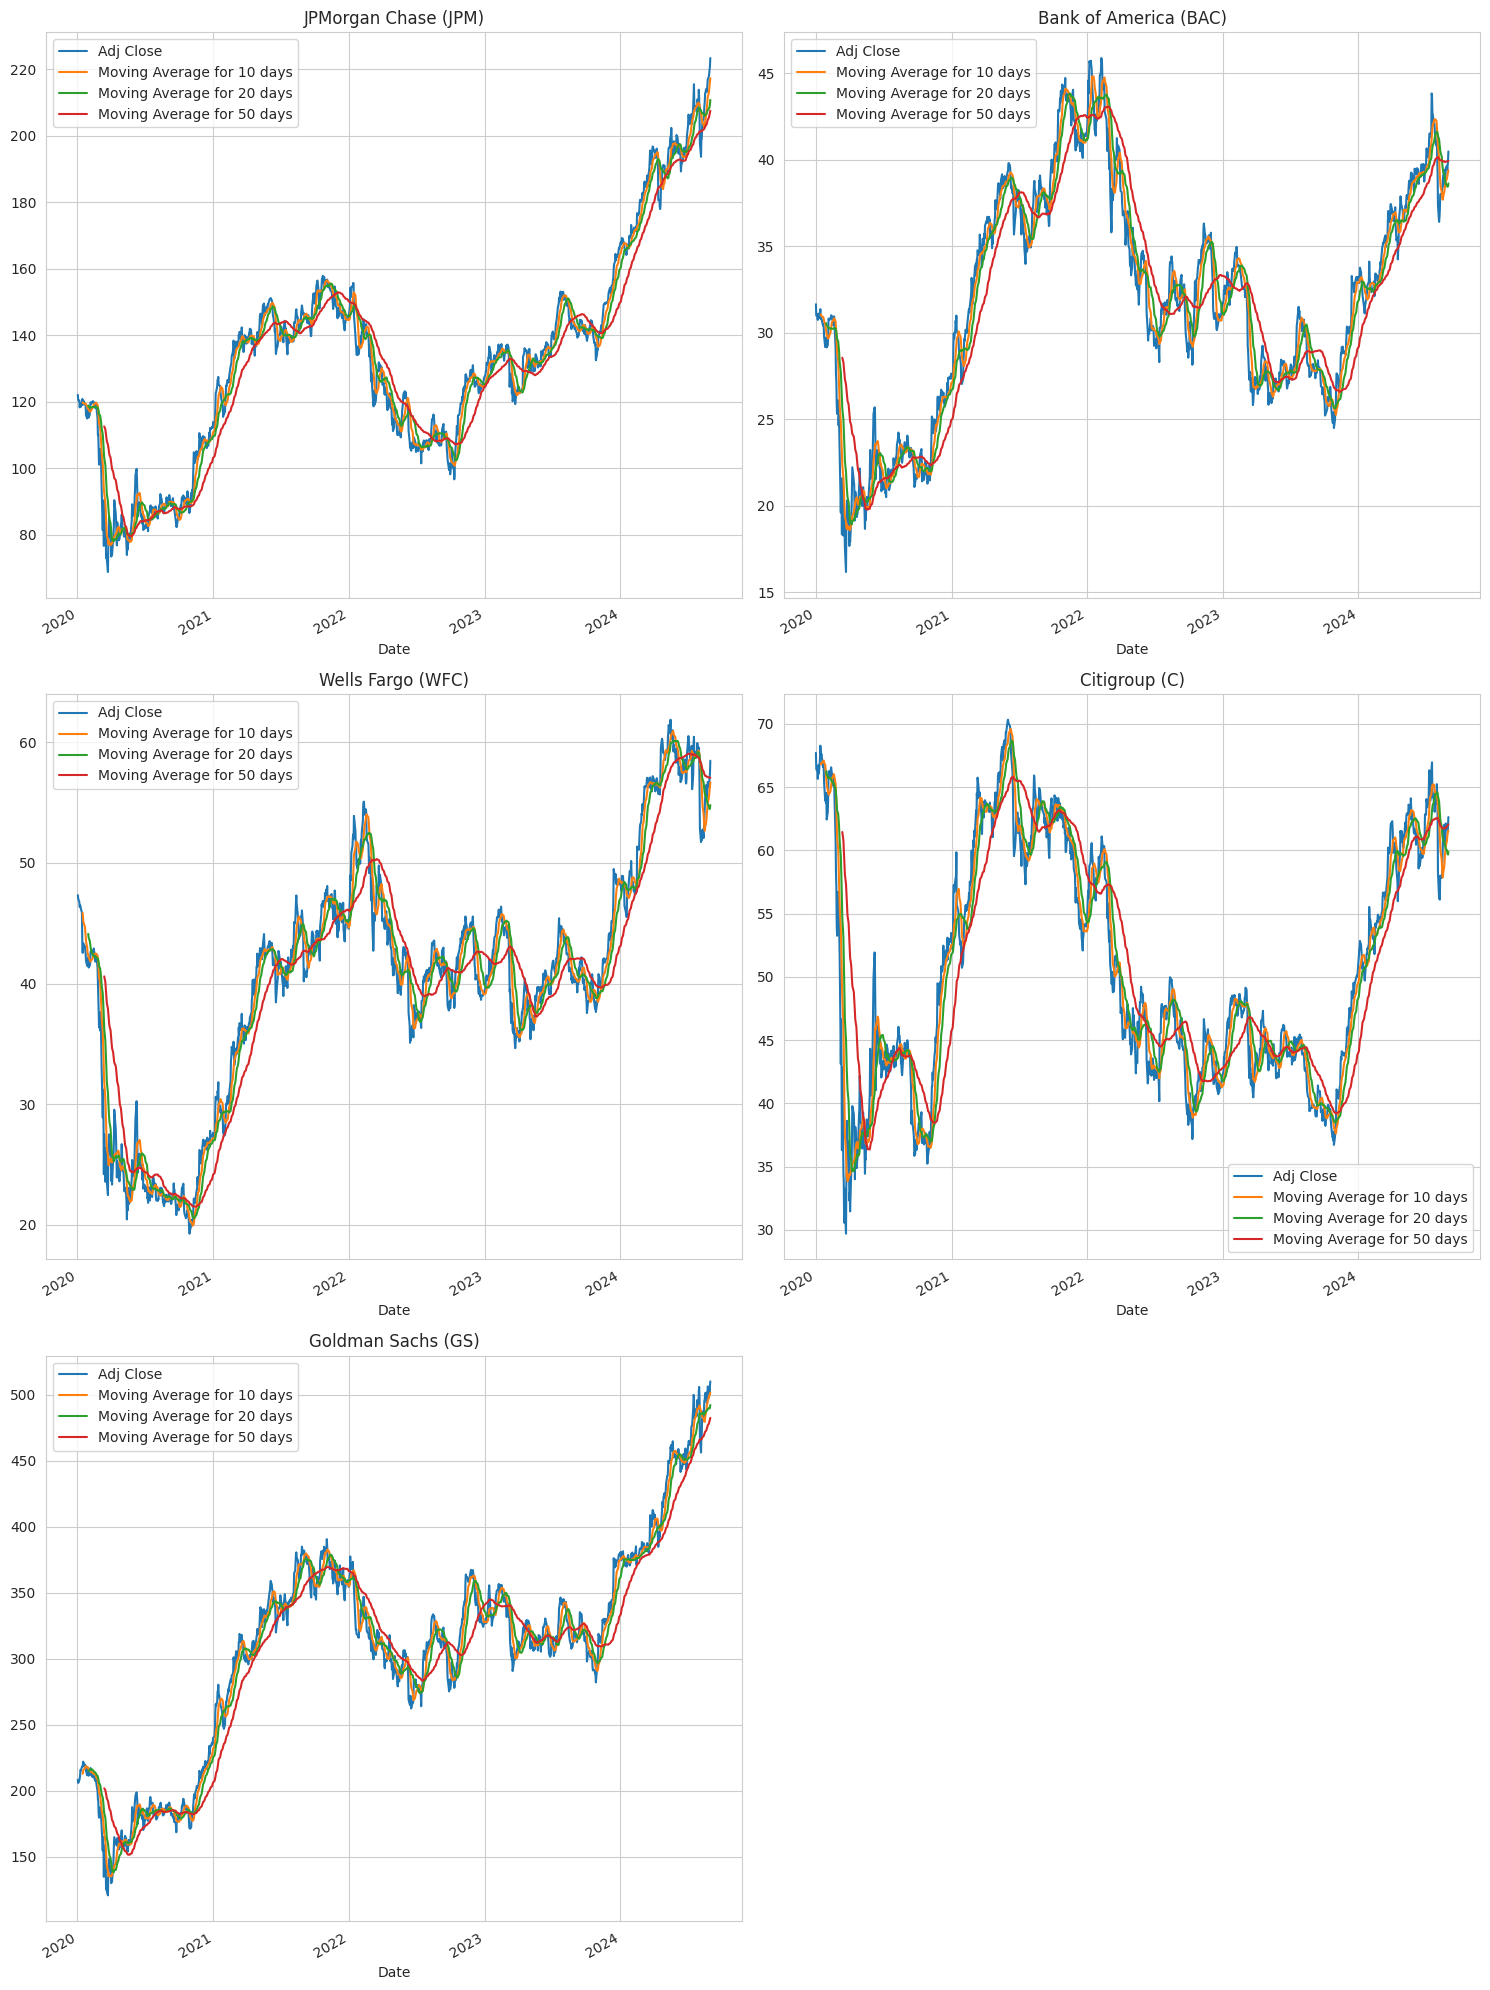

In [ ]:
moving_average = [10,20,50]

for move in moving_average:
  for company in company_list:
    column_names= f"Moving Average for {move} days"
    company[column_names] = company['Adj Close'].rolling(move).mean()

fig, axes = plt.subplots(nrows = 3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

jpm[['Adj Close','Moving Average for 10 days','Moving Average for 20 days','Moving Average for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title("JPMorgan Chase (JPM)")

bac[['Adj Close','Moving Average for 10 days','Moving Average for 20 days','Moving Average for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title("Bank of America (BAC)")

wfc[['Adj Close','Moving Average for 10 days','Moving Average for 20 days','Moving Average for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title("Wells Fargo (WFC)")

c[['Adj Close','Moving Average for 10 days','Moving Average for 20 days','Moving Average for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title("Citigroup (C)")

gs[['Adj Close','Moving Average for 10 days','Moving Average for 20 days','Moving Average for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title("Goldman Sachs (GS)")

fig.delaxes(axes[2,1])

plt.tight_layout()
plt.show()


In [ ]:
bac.head(30)

,Open,High,Low,Close,Adj Close,Volume,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days
Date,,,,,,,,,
2020-01-02,35.349998,35.660000,35.290001,35.639999,31.647974,37614200,NaN,NaN,NaN
2020-01-03,34.980000,35.150002,34.759998,34.900002,30.990879,50357900,NaN,NaN,NaN
2020-01-06,34.410000,34.900002,34.369999,34.849998,30.946468,42185000,NaN,NaN,NaN
2020-01-07,34.700001,34.919998,34.529999,34.619999,30.742229,34149000,NaN,NaN,NaN
2020-01-08,34.570000,35.189999,34.549999,34.970001,31.053032,45311600,NaN,NaN,NaN
2020-01-09,35.299999,35.330002,34.939999,35.029999,31.106318,39861600,NaN,NaN,NaN
2020-01-10,35.000000,35.070000,34.660000,34.740002,30.848795,39730400,NaN,NaN,NaN
2020-01-13,34.840000,35.070000,34.660000,35.060001,31.132942,37956100,NaN,NaN,NaN
2020-01-14,35.299999,35.669998,35.110001,35.320000,31.363834,66719300,NaN,NaN,NaN


# Daily Return of the Stocks on Average

In [ ]:
company_list =[jpm,bac,wfc,c,gs]

for company in company_list:
  company['Daily Return'] =company['Adj Close'].pct_change()


In [ ]:
bac.head()

,Open,High,Low,Close,Adj Close,Volume,Previous Close,Gap,Daily Return
Date,,,,,,,,,
2020-01-06,34.410000,34.900002,34.369999,34.849998,30.946463,42185000,34.900002,-0.490002,NaN
2020-01-07,34.700001,34.919998,34.529999,34.619999,30.742228,34149000,34.849998,-0.149998,-0.006600
2020-01-08,34.570000,35.189999,34.549999,34.970001,31.053030,45311600,34.619999,-0.049999,0.010110
2020-01-09,35.299999,35.330002,34.939999,35.029999,31.106306,39861600,34.970001,0.329998,0.001716
2020-01-10,35.000000,35.070000,34.660000,34.740002,30.848793,39730400,35.029999,-0.029999,-0.008278


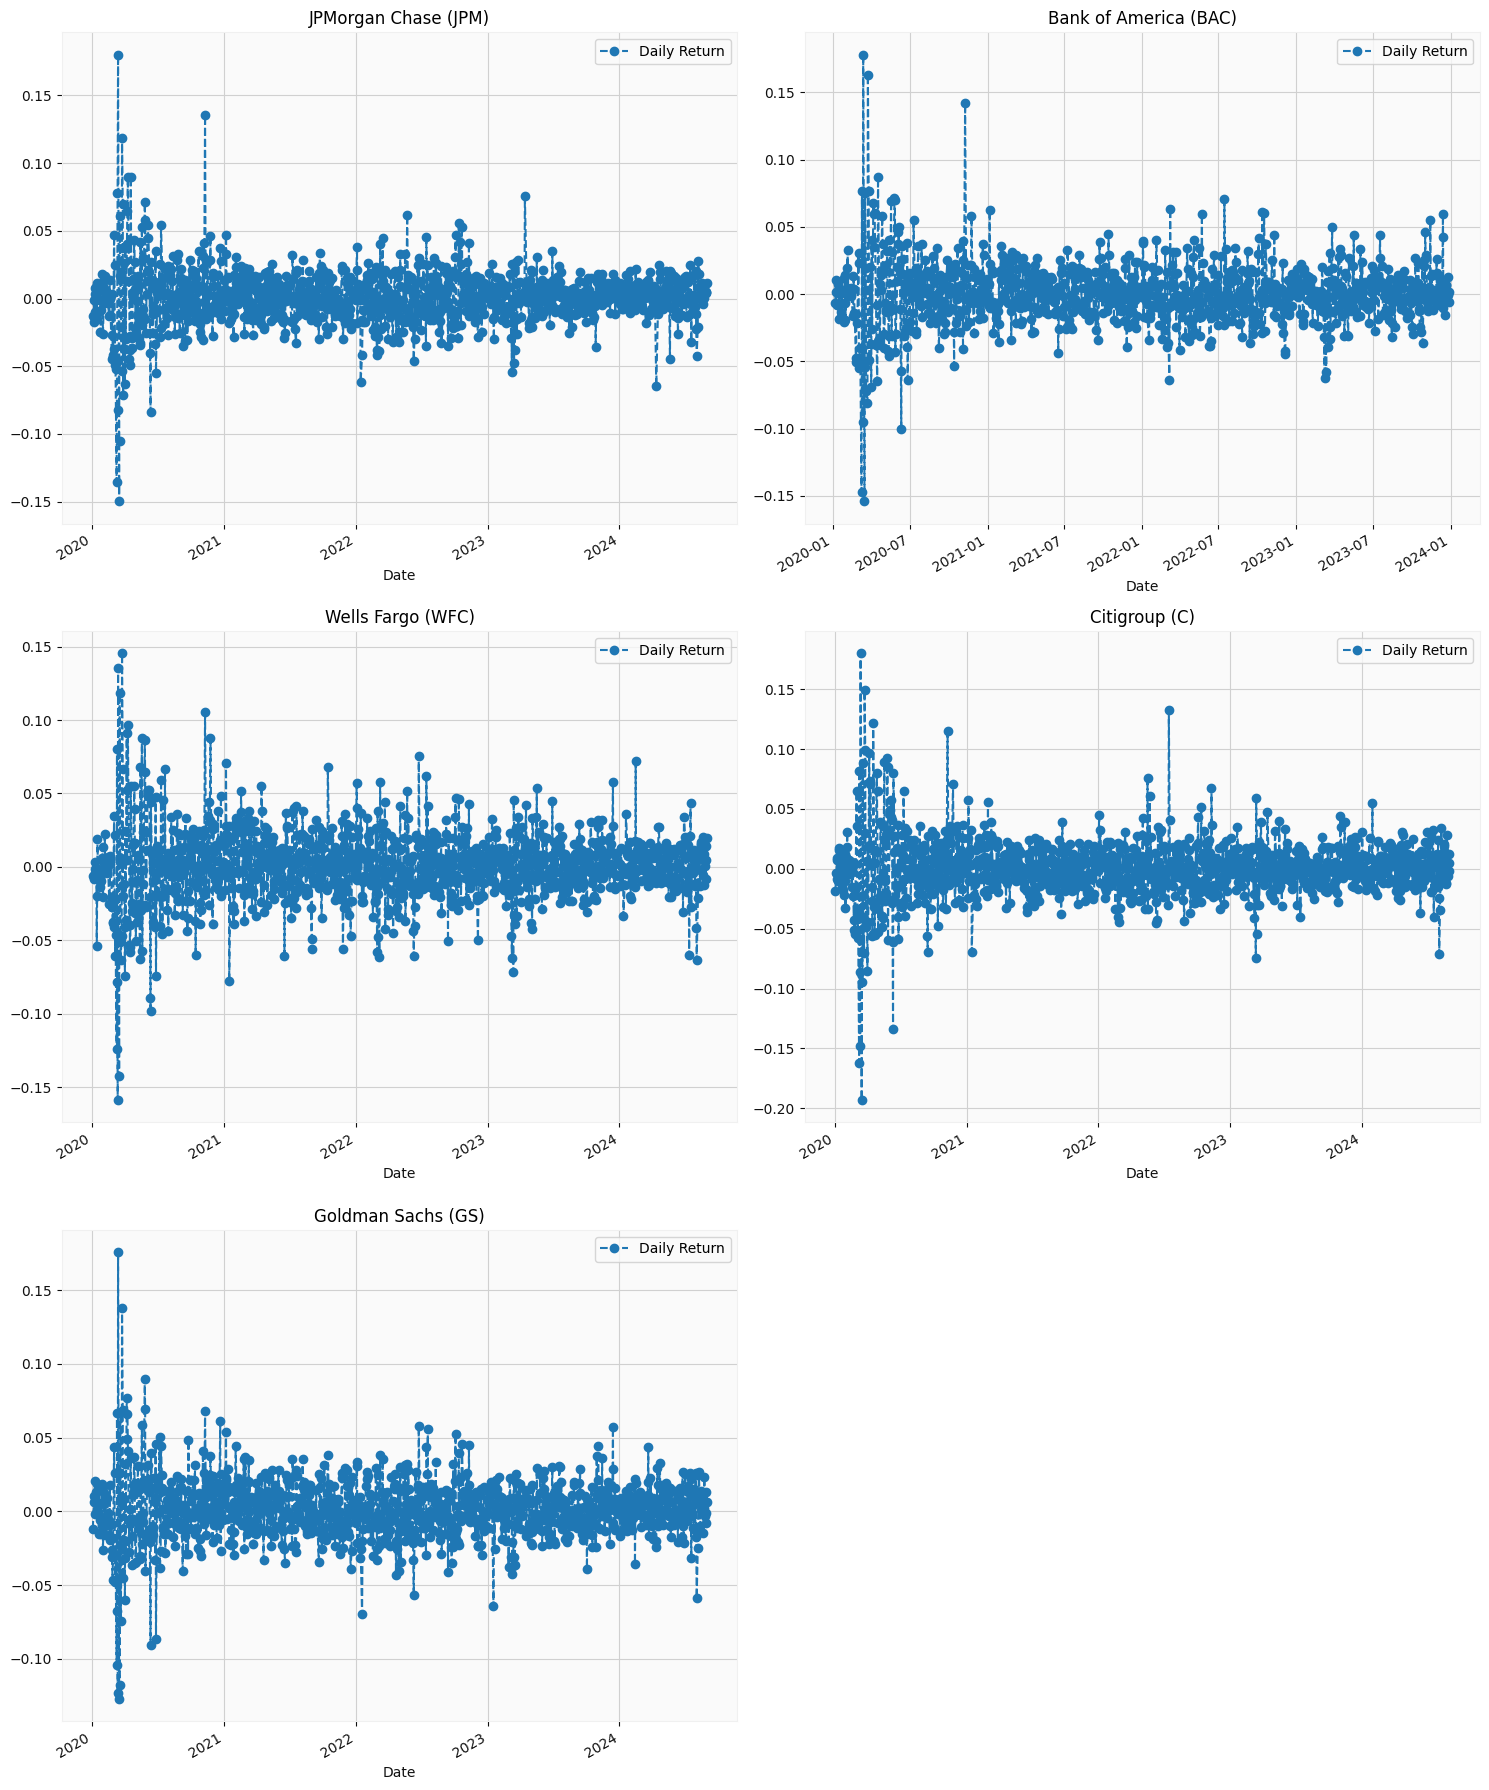

In [ ]:


fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_figheight(18)
fig.set_figwidth(15)

jpm['Daily Return'].plot(ax=axes[0,0],legend=True,linestyle = '--',marker='o')
axes[0,0].set_title("JPMorgan Chase (JPM)")

bac['Daily Return'].plot(ax=axes[0,1],legend=True,linestyle = '--',marker='o')
axes[0,1].set_title("Bank of America (BAC)")


wfc['Daily Return'].plot(ax=axes[1,0],legend=True,linestyle = '--',marker='o')
axes[1,0].set_title("Wells Fargo (WFC)")


c['Daily Return'].plot(ax=axes[1,1],legend=True,linestyle = '--',marker='o')
axes[1,1].set_title("Citigroup (C)")

gs['Daily Return'].plot(ax=axes[2,0],legend=True,linestyle = '--',marker='o')
axes[2,0].set_title("Goldman Sachs (GS)")

fig.delaxes(axes[2,1])

plt.tight_layout()

plt.show()

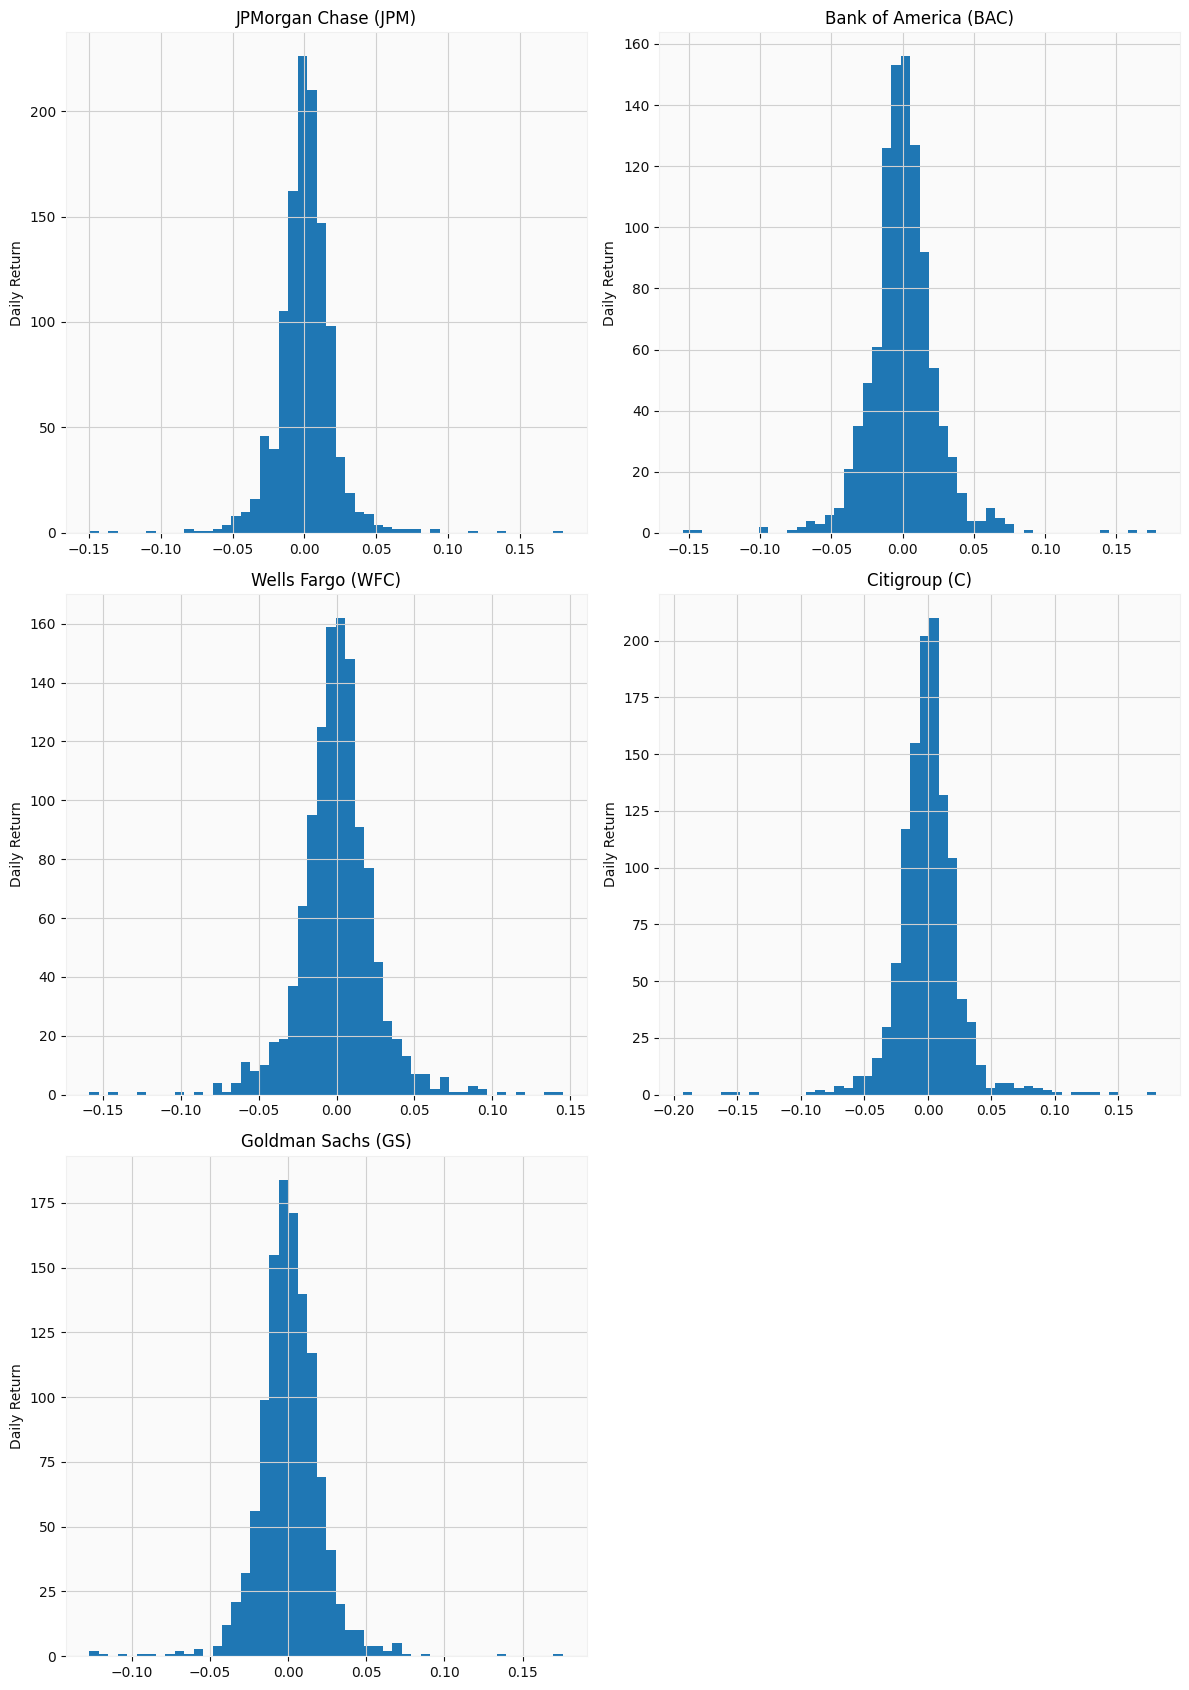

In [ ]:
plt.figure(figsize=(12,17))

for i, company in enumerate(company_list,1):
  plt.subplot(3,2,i)
  company['Daily Return'].hist(bins=50)
  plt.ylabel('Daily Return')
  plt.title(f'{company_names[i-1]}')

plt.tight_layout()

3. Financial Ratios and Fundamental Analysis

In [ ]:
bank_tickers = ["JPM","BAC","WFC","C","GS"]

bank_data = {ticker: yf.Ticker(ticker) for ticker in bank_tickers}



In [ ]:
def get_filtered_financial_data(ticker,startdate,enddate):
  bank =yf.Ticker(ticker)

  income_statement = bank.financials
  balance_sheet = bank.balance_sheet
  cash_flow = bank.cashflow

  filtered_income_statement = income_statement.loc[:, (income_statement.columns >= start_date) & (income_statement.columns <= end_date)]
  filtered_balance_sheet = balance_sheet.loc[:, (balance_sheet.columns >= start_date) & (balance_sheet.columns <= end_date)]
  filtered_cash_flow = cash_flow.loc[:, (cash_flow.columns >= start_date) & (cash_flow.columns <= end_date)]

  return{
      'income_statement': filtered_income_statement,
      'balance_sheet': filtered_balance_sheet,
       'cash_flow': filtered_cash_flow

  }


## JPMorgan Chase (JPM)


In [ ]:
startdate='2020-12-31'
enddate = '2023-12-31'


In [ ]:
jpm_income_statement_filtered = get_filtered_financial_data('JPM',startdate,enddate)
jpm_income_statement_filtered['income_statement']

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,-447272000.0,-48944000.0,-80514000.0,0.0
Tax Rate For Calcs,0.196,0.184,0.189,0.187
Total Unusual Items,-2282000000.0,-266000000.0,-426000000.0,NaN
Total Unusual Items Excluding Goodwill,-2282000000.0,-266000000.0,-426000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,49552000000.0,37676000000.0,48334000000.0,29131000000.0
Reconciled Depreciation,7512000000.0,7051000000.0,7932000000.0,8614000000.0
Net Interest Income,89267000000.0,66710000000.0,52311000000.0,54563000000.0
Interest Expense,81321000000.0,26097000000.0,5553000000.0,9960000000.0
Interest Income,170588000000.0,92807000000.0,57864000000.0,64523000000.0
Normalized Income,51386728000.0,37893056000.0,48679486000.0,29131000000.0


In [ ]:
jpm_balance_sheet_filtered = get_filtered_financial_data('JPM',startdate,enddate)
jpm_balance_sheet= jpm_balance_sheet_filtered['balance_sheet']
jpm_balance_sheet

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Treasury Shares Number,1228275301.0,1170676094.0,1160784750.0,1055499435.0
Preferred Shares Number,391850000.0,391850000.0,391850000.0,280850000.0
Ordinary Shares Number,2876658594.0,2934257801.0,2944149145.0,3049434460.0
Share Issued,4104933895.0,4104933895.0,4104933895.0,4104933895.0
Net Debt,NaN,NaN,NaN,NaN
Total Debt,436537000000.0,339892000000.0,354599000000.0,326893000000.0
Tangible Book Value,236093000000.0,204069000000.0,202598000000.0,195863000000.0
Invested Capital,737011000000.0,604820000000.0,613888000000.0,576184000000.0
Net Tangible Assets,263497000000.0,231473000000.0,237436000000.0,225926000000.0
Common Stock Equity,300474000000.0,264928000000.0,259289000000.0,249291000000.0


In [ ]:
# Fetch filtered data for JPM (or any other bank)
jpm_filtered_data = get_filtered_financial_data('JPM', start_date, end_date)

# Print out the columns of the income statement to inspect the structure
jpm_income_statement = jpm_filtered_data['income_statement']
jpm_income_statement


,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,-447272000.0,-48944000.0,-80514000.0,0.0
Tax Rate For Calcs,0.196,0.184,0.189,0.187
Total Unusual Items,-2282000000.0,-266000000.0,-426000000.0,NaN
Total Unusual Items Excluding Goodwill,-2282000000.0,-266000000.0,-426000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,49552000000.0,37676000000.0,48334000000.0,29131000000.0
Reconciled Depreciation,7512000000.0,7051000000.0,7932000000.0,8614000000.0
Net Interest Income,89267000000.0,66710000000.0,52311000000.0,54563000000.0
Interest Expense,81321000000.0,26097000000.0,5553000000.0,9960000000.0
Interest Income,170588000000.0,92807000000.0,57864000000.0,64523000000.0
Normalized Income,51386728000.0,37893056000.0,48679486000.0,29131000000.0


In [ ]:
import pandas as pd

# Assuming 'jpm_income_statement' and 'jpm_balance_sheet' are DataFrames with multiple columns for each year
# Extracting necessary data from balance sheet and income statement for each year
net_income = jpm_income_statement.loc['Net Income']  # Net Income for each year
total_assets = jpm_balance_sheet.loc['Total Assets']  # Total Assets for each year

# Calculate ROA for each year
roa = net_income / total_assets

# Create a DataFrame to store the results
roa_df = pd.DataFrame({
    'Year': roa.index,
    'ROA': roa.values
})

# Print the DataFrame as a table
roa_df

,Year,ROA
0,2023-12-31,0.012786
1,2022-12-31,0.010278
2,2021-12-31,0.012911
3,2020-12-31,0.008607


In [ ]:
def calculate_financial_ratios(financial_data):
    # Extract data from the filtered financial statements
    income_statement = financial_data['income_statement']
    balance_sheet = financial_data['balance_sheet']
    cash_flow = financial_data['cash_flow']

    # Try to identify correct labels dynamically
    # Use the column/row names that exist in the data
    gross_profit_label = 'Gross Profit' if 'Gross Profit' in income_statement.index else income_statement.index[0]  # Adjust based on actual data
    operating_income_label = 'Operating Income' if 'Operating Income' in income_statement.index else income_statement.index[1]  # Adjust as necessary

    # Calculate Profitability Ratios
    gross_margin = income_statement.loc[gross_profit_label] / income_statement.loc['Total Revenue'] if 'Total Revenue' in income_statement.index else None
    operating_margin = income_statement.loc[operating_income_label] / income_statement.loc['Total Revenue'] if 'Total Revenue' in income_statement.index else None
    net_profit_margin = income_statement.loc['Net Income'] / income_statement.loc['Total Revenue'] if 'Net Income' in income_statement.index and 'Total Revenue' in income_statement.index else None

    # Calculate Return on Assets (ROA) and Return on Equity (ROE)
    roa = income_statement.loc['Net Income'] / balance_sheet.loc['Total Assets'] if 'Net Income' in income_statement.index and 'Total Assets' in balance_sheet.index else None
    roe = income_statement.loc['Net Income'] / balance_sheet.loc['Total Stockholder Equity'] if 'Net Income' in income_statement.index and 'Total Stockholder Equity' in balance_sheet.index else None

    # Liquidity Ratios
    current_ratio = balance_sheet.loc['Total Current Assets'] / balance_sheet.loc['Total Current Liabilities'] if 'Total Current Assets' in balance_sheet.index and 'Total Current Liabilities' in balance_sheet.index else None
    quick_ratio = (balance_sheet.loc['Cash And Cash Equivalents'] + balance_sheet.loc['Receivables Net'] + balance_sheet.loc['Marketable Securities']) / balance_sheet.loc['Total Current Liabilities'] if 'Cash And Cash Equivalents' in balance_sheet.index and 'Receivables Net' in balance_sheet.index else None

    # Leverage Ratios
    debt_to_equity = balance_sheet.loc['Total Debt'] / balance_sheet.loc['Total Stockholder Equity'] if 'Total Debt' in balance_sheet.index and 'Total Stockholder Equity' in balance_sheet.index else None
    debt_to_assets = balance_sheet.loc['Total Debt'] / balance_sheet.loc['Total Assets'] if 'Total Debt' in balance_sheet.index and 'Total Assets' in balance_sheet.index else None

    # Efficiency Ratios
    asset_turnover = income_statement.loc['Total Revenue'] / balance_sheet.loc['Total Assets'] if 'Total Revenue' in income_statement.index and 'Total Assets' in balance_sheet.index else None

    # Cash Flow Ratios
    operating_cash_flow_to_net_income = cash_flow.loc['Operating Cash Flow'] / income_statement.loc['Net Income'] if 'Operating Cash Flow' in cash_flow.index and 'Net Income' in income_statement.index else None
    free_cash_flow = cash_flow.loc['Operating Cash Flow'] - cash_flow.loc['Capital Expenditures'] if 'Capital Expenditures' in cash_flow.index else None

    # Return the calculated ratios as a dictionary
    ratios = {
        'Gross Margin': gross_margin,
        'Operating Margin': operating_margin,
        'Net Profit Margin': net_profit_margin,
        'ROA': roa,
        'ROE': roe,
        'Current Ratio': current_ratio,
        'Quick Ratio': quick_ratio,
        'Debt to Equity Ratio': debt_to_equity,
        'Debt to Assets Ratio': debt_to_assets,
        'Asset Turnover': asset_turnover,
        'Operating Cash Flow to Net Income': operating_cash_flow_to_net_income,
        'Free Cash Flow': free_cash_flow
    }

    return ratios


In [ ]:
import pandas as pd

# List of bank tickers
bank_tickers = ["JPM", "BAC", "WFC", "C", "GS"]

# Initialize a list to store the ratios for each bank
all_bank_ratios = []

# Loop through the tickers and calculate ratios for each bank
for ticker in bank_tickers:
    # Get the filtered financial data for the bank (this function should return the data in the above format)
    bank_data = get_filtered_financial_data(ticker, start_date, end_date)

    # Calculate financial ratios for the bank
    bank_ratios = calculate_financial_ratios(bank_data)

    # Convert to DataFrame and drop NaN values
    bank_ratios_df = pd.DataFrame(bank_ratios)

    # Select the latest available value (drop NaN values if needed)
    cleaned_ratios = bank_ratios_df.apply(lambda row: row.dropna().iloc[-1], axis=1)

    # Add the bank ticker to the series
    cleaned_ratios["Bank"] = ticker

    # Append to the list
    all_bank_ratios.append(cleaned_ratios)

# Combine all the individual bank ratios into a single DataFrame
financial_ratios_df = pd.DataFrame(all_bank_ratios)

# Display the DataFrame
financial_ratios_df

,2023-12-31 00:00:00,2022-12-31 00:00:00,2021-12-31 00:00:00,2020-12-31 00:00:00,Bank
0,0.261826,2.843163,1.615509,-2.743126,JPM
1,1.696474,-0.229839,-0.224936,2.123226,BAC
2,2.108348,1.977627,-0.521281,0.607344,WFC
3,-7.955787,1.688717,2.145135,-2.126188,C
4,-1.478041,0.773288,0.291102,-1.959509,GS


In [ ]:
import pandas as pd

# List of bank tickers
bank_tickers = ["JPM", "BAC", "WFC", "C", "GS"]

# Initialize a dictionary to store the ratios for each bank separately
individual_bank_ratios = {}

# Loop through the tickers and calculate ratios for each bank
for ticker in bank_tickers:
    # Get the filtered financial data for the bank
    bank_data = get_filtered_financial_data(ticker, start_date, end_date)

    # Calculate financial ratios for the bank
    bank_ratios = calculate_financial_ratios(bank_data)

    # Store the ratios for each bank in the dictionary
    individual_bank_ratios[ticker] = pd.DataFrame([bank_ratios], index=[ticker])

# Now you have a separate table (DataFrame) for each bank
# Display the financial ratios for each bank
for ticker, ratios_df in individual_bank_ratios.items():
    print(f"\nFinancial Ratios for {ticker}:")
    ratios_df



Financial Ratios for JPM:

Financial Ratios for BAC:

Financial Ratios for WFC:

Financial Ratios for C:

Financial Ratios for GS:


In [ ]:
import pandas as pd

# List of bank tickers
bank_tickers = ["JPM", "BAC", "WFC", "C", "GS"]

# Initialize a list to store each bank's ratios
all_bank_ratios = []

# Loop through the tickers and calculate ratios for each bank
for ticker in bank_tickers:
    # Get the filtered financial data for the bank
    bank_data = get_filtered_financial_data(ticker, start_date, end_date)

    # Calculate financial ratios for the bank
    bank_ratios = calculate_financial_ratios(bank_data)

    # Add the bank's ratios along with the ticker to the list
    bank_ratios["Bank"] = ticker  # Add bank ticker to the ratios
    all_bank_ratios.append(bank_ratios)

# Combine all the individual bank ratios into a single DataFrame
financial_ratios_df = pd.DataFrame(all_bank_ratios)

# Display the DataFrame
financial_ratios_df

,Gross Margin,Operating Margin,Net Profit Margin,ROA,ROE,Current Ratio,Quick Ratio,Debt to Equity Ratio,Debt to Assets Ratio,Asset Turnover,Operating Cash Flow to Net Income,Free Cash Flow,Bank
0,2023-12-31 -0.002887 2022-12-31 -0.00038 ...,2023-12-31 0.0 2022-12-31 0.0 2021-12-31...,2023-12-31 0.319789 2022-12-31 0.292877 ...,2023-12-31 0.012786 2022-12-31 0.010278 ...,None,None,None,None,2023-12-31 0.112643 2022-12-31 0.092721 ...,2023-12-31 0.039984 2022-12-31 0.035093 ...,2023-12-31 0.261826 2022-12-31 2.843163 ...,None,JPM
1,2023-12-31 -0.001363 2022-12-31 0.0 ...,2023-12-31 0.0 2022-12-31 0.0 2021-12-31...,2023-12-31 0.268967 2022-12-31 0.289921 ...,2023-12-31 0.008338 2022-12-31 0.009022 ...,None,None,None,None,2023-12-31 0.105121 2022-12-31 0.099271 ...,2023-12-31 0.030999 2022-12-31 0.031117 ...,2023-12-31 1.696474 2022-12-31 -0.229839 ...,None,BAC
2,2023-12-31 0.0 2022-12-31 0.0 20...,2023-12-31 0.0 2022-12-31 0.0 2021-12-31...,2023-12-31 0.231752 2022-12-31 0.18391 ...,2023-12-31 0.009905 2022-12-31 0.007271 ...,None,None,None,None,2023-12-31 0.11357 2022-12-31 0.103876 ...,2023-12-31 0.042742 2022-12-31 0.039536 ...,2023-12-31 2.108348 2022-12-31 1.977627 ...,None,WFC
3,2023-12-31 -0.002717 2022-12-31 0.0 ...,2023-12-31 0.0 2022-12-31 0.0 2021-12-31...,2023-12-31 0.117575 2022-12-31 0.197132 ...,2023-12-31 0.003826 2022-12-31 0.006143 ...,None,None,None,None,2023-12-31 0.134369 2022-12-31 0.131876 ...,2023-12-31 0.032542 2022-12-31 0.031161 ...,2023-12-31 -7.955787 2022-12-31 1.688717 ...,None,C
4,2023-12-31 -0.007577 2022-12-31 -0.0031 ...,2023-12-31 0.0 2022-12-31 0.0 2021-12-31...,2023-12-31 0.184114 2022-12-31 0.237749 ...,2023-12-31 0.005188 2022-12-31 0.00781 ...,None,None,None,None,2023-12-31 0.203003 2022-12-31 0.224857 ...,2023-12-31 0.028176 2022-12-31 0.032851 ...,2023-12-31 -1.478041 2022-12-31 0.773288 ...,None,GS


## BANK OF AMERICA

In [ ]:
bac_income_statement_filtered = get_filtered_financial_data('BAC',startdate,enddate)
bac_income_statement_filtered['income_statement']

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,-134400000.0,0.0,0.0,0.0
Tax Rate For Calcs,0.064,0.111,0.058806,0.057963
Total Unusual Items,-2100000000.0,NaN,NaN,NaN
Total Unusual Items Excluding Goodwill,-2100000000.0,NaN,NaN,NaN
Net Income From Continuing Operation Net Minority Interest,26515000000.0,27528000000.0,31978000000.0,17894000000.0
Reconciled Depreciation,2057000000.0,1978000000.0,1898000000.0,1843000000.0
Net Interest Income,56931000000.0,52462000000.0,42934000000.0,43360000000.0
Interest Expense,73331000000.0,20103000000.0,4738000000.0,8225000000.0
Interest Income,130262000000.0,72565000000.0,47672000000.0,51585000000.0
Normalized Income,28480600000.0,27528000000.0,31978000000.0,17894000000.0


## Wells Fargo (WFC)


In [ ]:
wfc_income_statement_filtered = get_filtered_financial_data('WFC',startdate,enddate)
wfc_income_statement_filtered['income_statement']

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,-404730000.0
Tax Rate For Calcs,0.12,0.141,0.207,0.27
Total Unusual Items,NaN,-5000000.0,-76000000.0,-1499000000.0
Total Unusual Items Excluding Goodwill,NaN,-5000000.0,-76000000.0,-1499000000.0
Net Income From Continuing Operation Net Minority Interest,19142000000.0,13677000000.0,22109000000.0,3377000000.0
Reconciled Depreciation,6271000000.0,6832000000.0,7890000000.0,8219000000.0
Net Interest Income,52375000000.0,44950000000.0,35779000000.0,39956000000.0
Interest Expense,32743000000.0,9074000000.0,3915000000.0,7963000000.0
Interest Income,85118000000.0,54024000000.0,39694000000.0,47919000000.0
Normalized Income,19142000000.0,13677000000.0,22109000000.0,4471270000.0


## Citigroup (C)


In [ ]:
C_income_statement_filtered = get_filtered_financial_data('C',startdate,enddate)
C_income_statement_filtered['income_statement']

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,-213213000.0,0.0,0.0,0.0
Tax Rate For Calcs,0.273,0.194,0.198,0.185
Total Unusual Items,-781000000.0,0.0,0.0,NaN
Total Unusual Items Excluding Goodwill,-781000000.0,0.0,0.0,NaN
Net Income From Continuing Operation Net Minority Interest,9229000000.0,15076000000.0,21945000000.0,11067000000.0
Reconciled Depreciation,4560000000.0,4262000000.0,3964000000.0,3937000000.0
Net Interest Income,54900000000.0,48668000000.0,42494000000.0,44751000000.0
Interest Expense,78358000000.0,25740000000.0,7981000000.0,13338000000.0
Interest Income,133258000000.0,74408000000.0,50475000000.0,58089000000.0
Normalized Income,9796787000.0,15076000000.0,21945000000.0,11067000000.0


## Goldman Sachs (GS)

In [ ]:
gs_income_statement_filtered = get_filtered_financial_data('GS',startdate,enddate)
gs_income_statement_filtered['income_statement']

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,-350451000.0,-146850000.0,-28600000.0,-868803590.031253
Tax Rate For Calcs,0.207,0.165,0.2,0.242007
Total Unusual Items,-1693000000.0,-890000000.0,-143000000.0,-3590000000.0
Total Unusual Items Excluding Goodwill,-1693000000.0,-890000000.0,-143000000.0,-3590000000.0
Net Income From Continuing Operation Net Minority Interest,8516000000.0,11261000000.0,21635000000.0,9459000000.0
Reconciled Depreciation,4856000000.0,2455000000.0,2015000000.0,1902000000.0
Net Interest Income,6351000000.0,7678000000.0,6470000000.0,4751000000.0
Interest Expense,62164000000.0,21346000000.0,5650000000.0,8938000000.0
Interest Income,68515000000.0,29024000000.0,12120000000.0,13689000000.0
Normalized Income,9858549000.0,12004150000.0,21749400000.0,12180196409.968746


## Return on Assets (ROA)

In [ ]:
bank_tickers = ["JPM", "BAC", "WFC", "C", "GS"]

In [ ]:

bank_tickers = ["JPM", "BAC", "WFC", "C", "GS"]

roa_dict = {}

for ticker in bank_tickers:

    bank_data = get_filtered_financial_data(ticker, start_date, end_date)

    net_income = bank_data['income_statement'].loc['Net Income']
    total_assets = bank_data['balance_sheet'].loc['Total Assets']

    roa = net_income / total_assets

    roa_dict[ticker] = roa

roa_df = pd.DataFrame(roa_dict)

roa_df = roa_df.T

roa_df.columns.name = 'Year'

roa_df

Year,2023-12-31,2022-12-31,2021-12-31,2020-12-31
JPM,0.012786,0.010278,0.012911,0.008607
BAC,0.008338,0.009022,0.010089,0.006346
WFC,0.009905,0.007271,0.011349,0.001729
C,0.003826,0.006143,0.00958,0.004888
GS,0.005188,0.00781,0.014778,0.008133


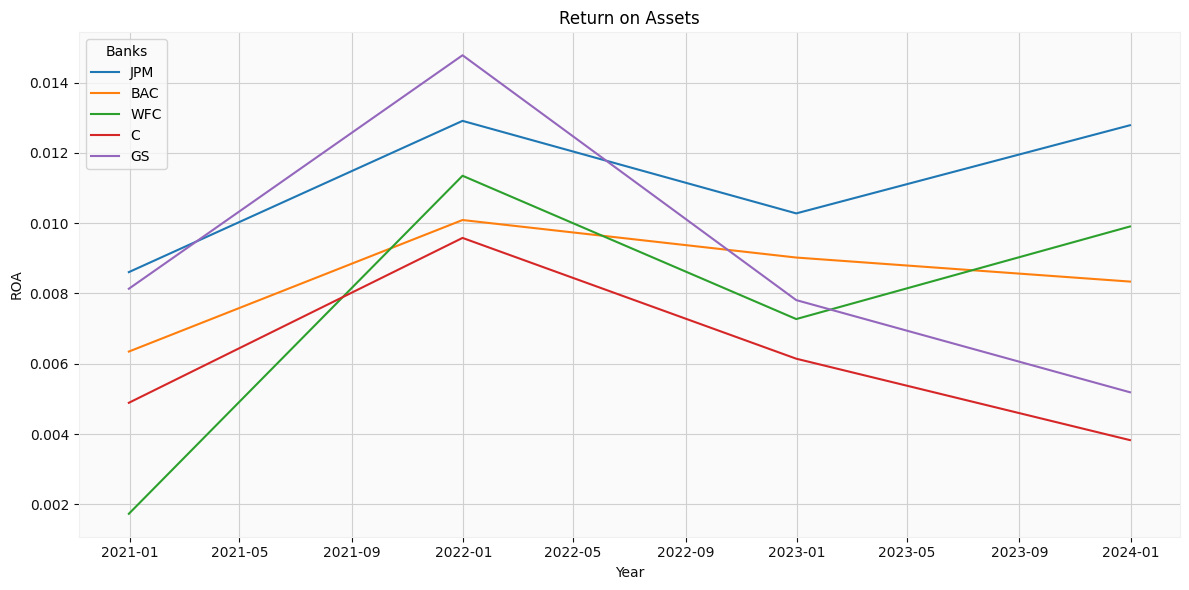

In [ ]:


# Plotting the net profit margin for each bank
plt.figure(figsize=(12, 6))

# Loop over each bank (row) in the DataFrame and plot
for bank in roa_df.index:
    plt.plot(roa_df.columns, roa_df.loc[bank], label=bank)

# Adding title and labels
plt.title('Return on Assets')
plt.xlabel('Year')
plt.ylabel('ROA')
plt.legend(title="Banks")

# Format the layout
plt.tight_layout()

# Show the plot
plt.show()

JPM and WFC have improved over time and seem to be using their assets more effectively to generate profits.

BAC, C, and GS have seen either stagnation or decline in ROA, with GS showing the most significant drop from 2021 to 2023.

A rising ROA indicates better profitability and efficient asset utilization, while a declining ROA could suggest operational inefficiencies, increased asset base without proportional profit growth, or market challenges.

JPM seems to be leading in terms of profitability from assets, while GS and C have shown concerning declines in recent years.

## Net Profit Margin =
Net Income/
Revenue






In [ ]:
net_profit_margin = {}

for ticker in bank_tickers:
  bank_data = get_filtered_financial_data(ticker,start_date,end_date)

  net_profit = bank_data['income_statement'].loc['Net Income']
  total_revenue = bank_data['income_statement'].loc['Total Revenue']

  netmargin = net_profit/total_revenue

  net_profit_margin[ticker] = netmargin


net_profit_margin_df = pd.DataFrame(net_profit_margin)

net_profit_margin_df = net_profit_margin_df.T

net_profit_margin_df.columns.name = 'Year'

net_profit_margin_df

Year,2023-12-31,2022-12-31,2021-12-31,2020-12-31
JPM,0.319789,0.292877,0.397206,0.242995
BAC,0.268967,0.289921,0.358848,0.209218
WFC,0.231752,0.18391,0.279274,0.045473
C,0.117575,0.197132,0.305368,0.14633
GS,0.184114,0.237749,0.3646,0.21228


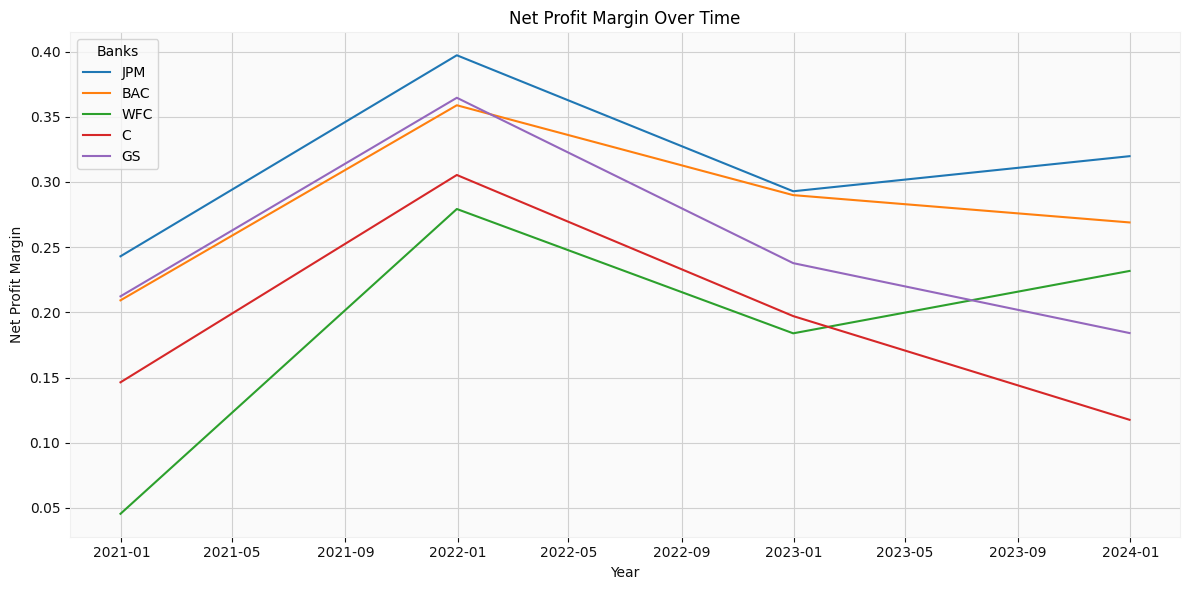

In [ ]:


# Plotting the net profit margin for each bank
plt.figure(figsize=(12, 6))

# Loop over each bank (row) in the DataFrame and plot
for bank in net_profit_margin_df.index:
    plt.plot(net_profit_margin_df.columns, net_profit_margin_df.loc[bank], label=bank)

# Adding title and labels
plt.title('Net Profit Margin Over Time')
plt.xlabel('Year')
plt.ylabel('Net Profit Margin')
plt.legend(title="Banks")

# Format the layout
plt.tight_layout()

# Show the plot
plt.show()


Banks like JPM and BAC have shown consistent profitability over time, with only minor fluctuations.
WFC and GS saw more volatility, with large swings in profitability, especially WFC, which had a large recovery from 2020.
Citi has faced challenges in profitability post-2021, with its margin consistently decreasing.

4. Strategy Implementation


5. Backtesting and Performance Evaluation


6. Real-Time Data Integration


7. Sentiment Analysis and Market News


8. Machine Learning Integration


9. Portfolio Optimization


10. Automated Trading and Execution
